In [1]:
import pandas as pd

In [2]:
d = pd.read_csv('./dataset_classes.csv')
d.head()

,channel_id,id,date,message,url,site_name,title,description,class
0,1.018448e+09,3336.0,1.583513e+09,"Нет, я вспомнил. есть хорошие новости, с котор...",https://spreadprivacy.com/duckduckgo-tracker-r...,DuckDuckGo Blog,DuckDuckGo Tracker Radar Exposes Hidden Tracking,"DuckDuckGo Tracker Radar is a best-in-class, a...",2.0
1,1.018448e+09,3335.0,1.583511e+09,"В Штатах, кажется, хотят сделать очень невыгод...",https://www.judiciary.senate.gov/press/rep/rel...,www.judiciary.senate.gov,"Graham, Blumenthal, Hawley, Feinstein Introduc...",United States Senate Committee on the Judiciary,2.0
2,1.018448e+09,3334.0,1.583472e+09,"аппаратная дыра в процессорах Intel, а точнее ...",https://blog.ptsecurity.com/2020/03/intelx86-r...,Ptsecurity,Intel x86 Root of Trust: loss of trust,"The scenario that Intel system architects, eng...",5.0
3,1.018448e+09,3333.0,1.583430e+09,Let’s Encrypt пока что не будет отзывать часть...,https://community.letsencrypt.org/t/2020-02-29...,Let's Encrypt Community Support,2020.02.29 CAA Rechecking Bug,"On 2020-02-29 UTC, Let’s Encrypt found a bug i...",5.0
4,1.018448e+09,3332.0,1.583409e+09,Интересное видео с выступлением менеджеров Mic...,https://www.youtube.com/watch?v=B_mhJO2qHlQ,YouTube,Breaking Password Dependencies: Challenges in ...,"Lee Walker, Principal Architect, Microsoft Ale...",2.0


In [3]:
filter_1 = d['class'] == 1.
filter_2 = d['class'] == 2.
filter_3 = d['class'] == 3.
filter_4 = d['class'] == 4.
filter_5 = d['class'] == 5.
filter_6 = d['class'] == 5

df = d.loc[filter_1 | filter_2 | filter_3 | filter_4 | filter_5 | filter_6]

In [4]:
df['class'].unique()

array([2., 5., 4., 1., 3.])

In [5]:
df.describe()

,channel_id,id,date,class
count,1.290000e+03,1290.000000,1.290000e+03,1290.000000
mean,1.210020e+09,274150.023256,1.582899e+09,2.963566
std,1.107565e+08,197209.045521,2.077876e+06,0.901377
min,1.018448e+09,3137.000000,1.573583e+09,1.000000
25%,1.109035e+09,5377.250000,1.583533e+09,3.000000
50%,1.303657e+09,454546.500000,1.583616e+09,3.000000
75%,1.303657e+09,454918.750000,1.583694e+09,3.000000
max,1.303657e+09,455245.000000,1.583758e+09,5.000000


In [6]:
df.message.dropna(inplace = True)
len_data = df.message.apply(len)
len_data.describe()

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


count    1261.000000
mean      129.474227
std       282.352625
min         1.000000
25%        10.000000
50%        25.000000
75%        86.000000
max      3191.000000
Name: message, dtype: float64

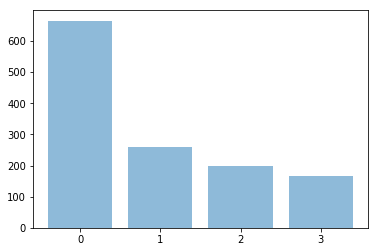

In [7]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

counts = df.channel_id.value_counts()
values = counts.tolist()
labels = counts.index.tolist()


y_pos = np.arange(len(labels))

 
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, range(len(labels)))

 
plt.show()

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


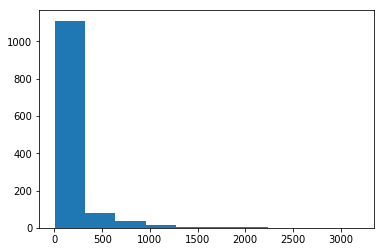

In [8]:
fig, ax = plt.subplots()

length = len_data[len_data < 10000].tolist()

n, bins, patches = ax.hist(length)

fig.show()

In [9]:
import re
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [10]:
df.message = df.message.str.lower()
df.message = df.message.apply(words_only)

df.message.iloc[0]

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


'нет я вспомнил есть хорошие новости с которыми вас можно оставить на длинные выходные популярный поисковик с фокусом на конфиденциальности пользовательских данных опубликовал в виде открытого исходного кода проект который содержит список из более чем тыс доменов принадлежащих почти тысячам компаний которые следят за пользователями в онлайне сами используют этот список в своих блокировщиках трекинга и предлагают другим компаниям использовать этот список в своих продуктах хорошее дело в общем'

### Самые частые слова

In [11]:
from nltk import FreqDist
n_types = []
n_tokens = []
tokens = []
fd = FreqDist()
for index, row in df.iterrows():
    tokens = row['message'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))
for i in fd.most_common(10):
    print(i)

('в', 578)
('и', 519)
('на', 267)
('что', 248)
('не', 248)
('с', 225)
('к', 169)
('как', 164)
('по', 149)
('для', 141)


In [12]:
from nltk.corpus import stopwords
# print(stopwords.words('russian'))

In [20]:
with open("/Users/romakindmitriy/PycharmProjects/TelegramParser/docs/stopwords/fullstopwords.txt", 'r') as f:
    stopw = f.readlines()

# print(stopw)
v_stopwords = list(set([x[:-1] for x in stopw]))
print(len(v_stopwords))

854


In [21]:
mystopwords = stopwords.words('russian') + v_stopwords
mystopwords = list(set(mystopwords))

In [22]:
def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
 

In [23]:
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [24]:
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'лс', 'год']

def remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

In [25]:
df.message = df.message.apply(remove_stopwords) 
df.message = df.message.apply(lemmatize)
df.message = df.message.apply(remove_stoplemmas) 

In [26]:
lemmata = []
for index, row in df.iterrows():
    lemmata += row['message'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(100):
    print(i)

('гарант', 39)
('сфера', 39)
('взлом', 34)
('админ', 31)
('сша', 27)
('купить', 27)
('камера', 26)
('чат', 24)
('вредоносный', 21)
('документ', 21)
('сс', 20)
('палка', 20)
('кук', 19)
('карта', 19)
('код', 18)
('злоумышленник', 18)
('настройка', 18)
('баланс', 18)
('почта', 17)
('распознавание', 17)
('клиент', 17)
('фотография', 17)
('онлайн', 16)
('сервер', 16)
('утечка', 16)
('продукт', 15)
('защита', 15)
('пара', 15)
('видео', 15)
('ключ', 15)
('апдейт', 15)
('браузер', 15)
('юс', 15)
('смартфон', 14)
('доступный', 14)
('бесплатный', 14)
('пробивать', 14)
('атака', 13)
('продажа', 13)
('умный', 13)
('файл', 13)
('фбр', 13)
('сотрудник', 13)
('пас', 13)
('орган', 12)
('эксперт', 12)
('связь', 12)
('алгоритм', 12)
('геолокация', 12)
('реклама', 12)
('акка', 12)
('отработка', 12)
('скам', 12)
('популярный', 11)
('пользовательский', 11)
('эксплуатация', 11)
('правоохранительный', 11)
('выплата', 11)
('че', 11)
('линк', 11)
('сап', 11)
('крот', 11)
('контент', 10)
('фб', 10)
('ставить',

In [27]:
tokens_by_topic = []
for topic in df['class'].unique():
    tokens = []
    sample = df[df['class']==topic]
    for i in range(len(sample)):
        tokens += sample.message.iloc[i].split()
    tokens_by_topic.append(tokens)

In [28]:
df['class'].unique()

array([2., 5., 4., 1., 3.])

Выберем событие, из текстов про которое будем извлекать ключевые слова:

In [29]:
event_id = 0
df['class'].unique()[event_id]

2.0

In [30]:
# %%time 
import nltk
from nltk.collocations import *
N_best = 100 # число извлекаемых биграм

bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(tokens_by_topic[event_id]) # класс для хранения и извлечения биграм
finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-100 биграм по каждой мере 
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

Результаты:

In [31]:
rankings = pd.DataFrame({ 'chi2': chi2_ranking, 'llr':llr_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(10)

,raw_freq,pmi,t-score,chi2,llr
0,правоохранительный орган,саудовский аравия,правоохранительный орган,саудовский аравия,правоохранительный орган
1,джефф безос,фоновый режим,фоновый режим,фоновый режим,фоновый режим
2,фоновый режим,комбинация логинов,джефф безос,правоохранительный орган,джефф безос
3,алгоритм распознавание,джефф безос,саудовский аравия,джефф безос,саудовский аравия
4,аппаратный ключ,аппаратный ключ,комбинация логинов,комбинация логинов,комбинация логинов
5,геолокация фоновый,разумеется отрицать,аппаратный ключ,аппаратный ключ,аппаратный ключ
6,комбинация логинов,правоохранительный орган,разумеется отрицать,разумеется отрицать,разумеется отрицать
7,онлайн эксплуатация,геолокация фоновый,геолокация фоновый,геолокация фоновый,геолокация фоновый
8,правительство сша,шифрование продукт,шифрование продукт,шифрование продукт,шифрование продукт
9,разумеется отрицать,онлайн эксплуатация,онлайн эксплуатация,онлайн эксплуатация,онлайн эксплуатация


Похожи ли списки биграм?

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


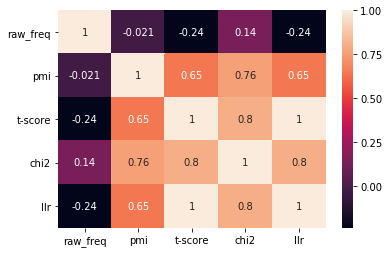

In [32]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline
corr = spearmanr(rankings).correlation
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings))

In [33]:
# %%time
from gensim.summarization import keywords
text = ' '.join(tokens_by_topic[event_id])
kw = keywords(text)

Результаты:

In [34]:
rankings = pd.DataFrame({'Text Rank': kw.split('\n')})
rankings.head(10)

,Text Rank
0,взлом
1,камера
2,фотография
3,распознавание
4,сша представлять законопроект
5,апдеит
6,клиент
7,алгоритм
8,фаил
9,магазин


### RAKE

Для RAKE нужны сырые тексты со стоп-словами:

In [35]:
dd = pd.read_csv('./dataset_classes.csv')
dd.head()
filter_1 = d['class'] == 1.
filter_2 = d['class'] == 2.
filter_3 = d['class'] == 3.
filter_4 = d['class'] == 4.
filter_5 = d['class'] == 5.
filter_6 = d['class'] == 5

raw_df = dd.loc[filter_1 | filter_2 | filter_3 | filter_4 | filter_5 | filter_6]

In [36]:
raw_df.message = raw_df.message.str.lower()
raw_df.message = raw_df.message.apply(words_only)
raw_df.message = raw_df.message.apply(lemmatize)
raw_df.head()

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,channel_id,id,date,message,url,site_name,title,description,class
0,1.018448e+09,3336.0,1.583513e+09,нет я вспомнить быть хороший новость с который...,https://spreadprivacy.com/duckduckgo-tracker-r...,DuckDuckGo Blog,DuckDuckGo Tracker Radar Exposes Hidden Tracking,"DuckDuckGo Tracker Radar is a best-in-class, a...",2.0
1,1.018448e+09,3335.0,1.583511e+09,в штат кажется хотеть сделать очень невыгодный...,https://www.judiciary.senate.gov/press/rep/rel...,www.judiciary.senate.gov,"Graham, Blumenthal, Hawley, Feinstein Introduc...",United States Senate Committee on the Judiciary,2.0
2,1.018448e+09,3334.0,1.583472e+09,аппаратный дыра в процессор а точно в движок к...,https://blog.ptsecurity.com/2020/03/intelx86-r...,Ptsecurity,Intel x86 Root of Trust: loss of trust,"The scenario that Intel system architects, eng...",5.0
3,1.018448e+09,3333.0,1.583430e+09,пока что не быть отзывать часть сертификат вып...,https://community.letsencrypt.org/t/2020-02-29...,Let's Encrypt Community Support,2020.02.29 CAA Rechecking Bug,"On 2020-02-29 UTC, Let’s Encrypt found a bug i...",5.0
4,1.018448e+09,3332.0,1.583409e+09,интересный видео с выступление менеджер отвеча...,https://www.youtube.com/watch?v=B_mhJO2qHlQ,YouTube,Breaking Password Dependencies: Challenges in ...,"Lee Walker, Principal Architect, Microsoft Ale...",2.0


In [37]:
text = ' '.join(raw_df[raw_df['class'] == raw_df['class'].unique()[event_id]].message.tolist())
len(text)

52818

Результаты RAKE:

In [38]:
import RAKE

# /Users/romakindmitriy/PycharmProjects/TelegramParser/docs/stopwords/fullstopwords.txt
# Rake = RAKE.Rake('./stopwords.txt')
Rake = RAKE.Rake('/Users/romakindmitriy/PycharmProjects/TelegramParser/docs/stopwords/fullstopwords.txt')
kp = [i[0] for i in Rake.run(text)]
rankings = pd.DataFrame({'RAKE': kp})
rankings.head(10)

,RAKE
0,вскрывать айфон мухамед саид алшамрани
1,конкретно принц мохаммед бин салман
2,генеральный прокурор сша уильям барра
3,дверной звонок напичкать сторонний трекер
4,средство предотвращение проникновение пропадат...
5,ключик прикупать нести добро апд
6,гигантский архивный файл занимать практически
7,неизвестный алгоритм выдавать код гражданин
8,полицейский задерживать житель синьцзян помечать
9,технический сложность продолжение ко вчерашний


## Вычисление сходства и Gensim

Представление данных в Gensim словарем и корпусом:

In [39]:
from gensim.corpora import *
df.sort_values(['class'], inplace = True)
texts = [df.message.iloc[i].split() for i in range(len(df))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Вычисление сходства по косинусной мере на векторах $tf-idf$:

In [40]:
# %%time
from gensim.models import  *
tfidf = TfidfModel(corpus)
print(tfidf[corpus])
corpus_tfidf = tfidf[corpus]

In [41]:
from gensim import similarities

index = similarities.MatrixSimilarity(tfidf[corpus])
sims = index[corpus_tfidf]

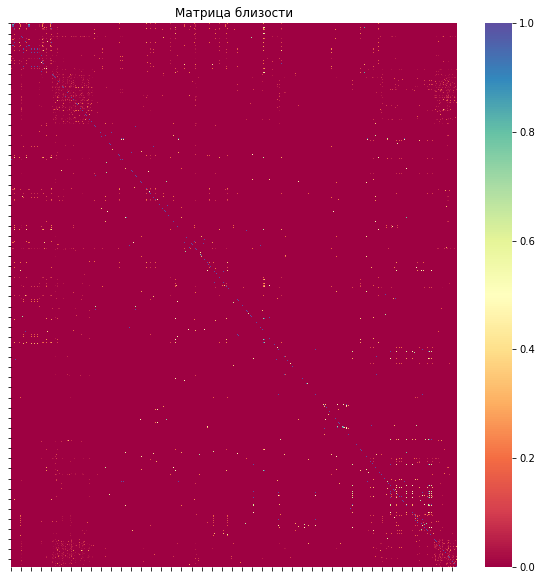

In [42]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))


sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

plt.title("Матрица близости")
plt.show()

## TSNE

In [43]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(df.message)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

/Users/romakindmitriy/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


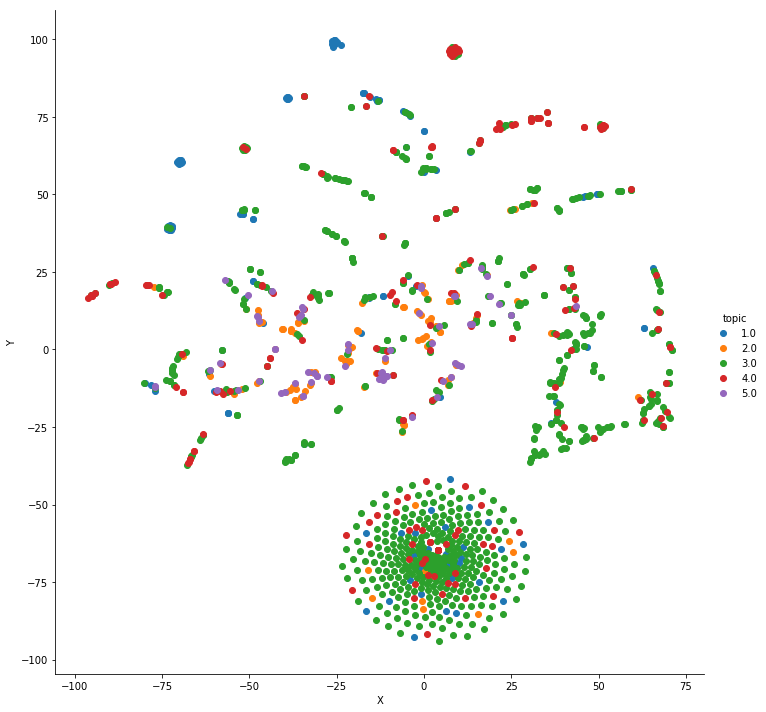

In [44]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df['class']})
sns.FacetGrid(vis_df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()